**GOLDEN TASK**
**SPEECH EMOTION RECOGNITION USING 1D CNN**

**IMPORT LIBRARIES**

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DEEP LEARNNING'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DEEP LEARNNING/9.jpeg
/content/drive/MyDrive/DEEP LEARNNING/1.jpeg
/content/drive/MyDrive/DEEP LEARNNING/8.jpeg
/content/drive/MyDrive/DEEP LEARNNING/features.csv


In [2]:
csv = '/content/drive/MyDrive/DEEP LEARNNING/features.csv'
Features = pd.read_csv(csv)

In [13]:
Features

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-637.701233,104.299019,4.894947,20.494011,12.552954,2.851410,-6.633390,-4.091278,-10.423918,-6.406950,...,0.172893,-1.170210,-5.292450,-0.573319,1.019471,-3.492607,-3.468123,-1.214944,1.971239,male_calm
1,-596.908460,86.871936,9.470162,17.109819,11.198966,1.541056,-6.677264,-5.755428,-9.684472,-6.891256,...,0.033803,-1.986515,-5.103855,-1.253110,0.514896,-3.268317,-4.502895,0.167153,0.256732,male_calm
2,-698.086548,99.795929,1.892679,19.915264,7.532868,1.265761,-9.188656,-5.798194,-12.299710,-4.976400,...,-1.639542,-2.603761,-4.890347,-0.879222,-1.250208,-3.449960,-4.708529,-0.086224,-3.034044,male_calm
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male_angry
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male_angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,-244.806780,9.993918,0.283868,-1.826234,-9.474588,-3.677899,-5.997603,-4.322441,-2.980860,-4.393075,...,-4.463648,-5.939352,-1.430617,-2.571979,-3.112922,0.026468,2.115303,0.063575,3.497223,female_surprise
4316,-451.196869,34.551537,-12.766367,-0.469773,-20.480389,-6.061997,-19.653013,-11.039007,-4.434286,-8.410524,...,-3.873847,-11.018853,4.842587,-4.569864,-3.723229,-1.223427,5.745018,-1.755407,11.676798,female_surprise
4317,-468.095856,72.921646,-30.435776,1.022192,-21.219824,-16.871128,-21.545273,-21.955904,-20.282740,-1.485851,...,-7.835970,-2.132884,-11.058331,-7.532458,-8.098359,-9.061543,-2.551595,-10.330959,-5.266533,female_disgust
4318,-316.846572,25.029758,-1.088165,-5.131652,-8.242224,-10.109052,-10.533463,-9.292198,-9.566851,-0.569008,...,-0.819196,-0.126867,-2.193538,-2.355684,-1.987450,-3.002287,-0.957942,-2.840216,-2.458961,female_disgust


**PLOTS OF VARIOUS EMOTIONS DATA**

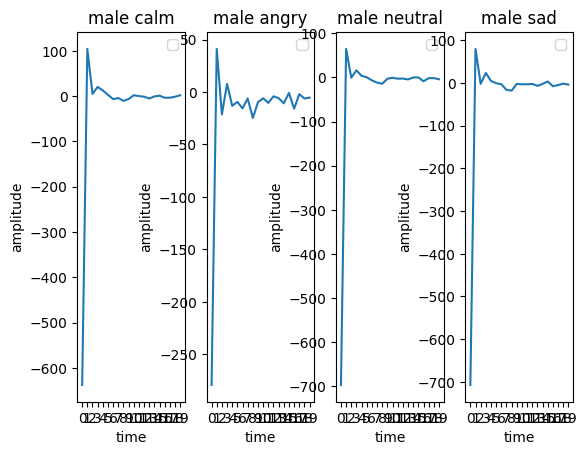

In [21]:
#sample plots for time series data
plt.subplot(1,4,1)
plt.plot(Features.iloc[0, :20])
plt.title('male calm')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.subplot(1,4,2)
plt.plot(Features.iloc[3, :20])
plt.title('male angry')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
print('\n')
plt.subplot(1,4,3)
plt.plot(Features.iloc[11, :20])
plt.title('male neutral')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()
plt.subplot(1,4,4)
plt.plot(Features.iloc[14, :20])
plt.title('male sad')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

**DATA PREPROCESSING**

In [44]:
#label encoding of label column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(Features['labels'])
print("Label Encoded Labels:", encoded_labels)

Label Encoded Labels: [9 9 9 ... 2 2 2]


In [45]:
unique_values = list(set(encoded_labels))
print(unique_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [46]:
X = Features.drop(columns=['labels'])
Y = Features['labels']

In [57]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=24, shuffle=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

**BUILDING 1D CNN MODEL**

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

# Assuming you have loaded and preprocessed your dataset into X_train, y_train, X_test, y_test

# Build the 1D CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(16,activation='softmax')  # num_classes is the number of emotion classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [55]:
x_train.shape

(3240, 20, 1)

In [56]:
y_train.shape

(3240,)

In [63]:
# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

history = model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/500
51/51 [==============================] - 1s 17ms/step - loss: 0.6215 - accuracy: 0.7713 - val_loss: 1.3766 - val_accuracy: 0.5741
Epoch 2/500
51/51 [==============================] - 1s 11ms/step - loss: 0.6160 - accuracy: 0.7657 - val_loss: 1.3535 - val_accuracy: 0.5815
Epoch 3/500
51/51 [==============================] - 1s 11ms/step - loss: 0.6169 - accuracy: 0.7633 - val_loss: 1.3748 - val_accuracy: 0.5944
Epoch 4/500
51/51 [==============================] - 0s 6ms/step - loss: 0.6147 - accuracy: 0.7701 - val_loss: 1.3777 - val_accuracy: 0.5833
Epoch 5/500
51/51 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7627 - val_loss: 1.4252 - val_accuracy: 0.5778
Epoch 6/500
51/51 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.7688 - val_loss: 1.3450 - val_accuracy: 0.5907
Epoch 7/500
51/51 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.7627 - val_loss: 1.4206 - val_accuracy: 0.5815
Epoch 8/50

** ACCURACY: 61.2%**

**PREDICITON ON TEST DATA**

In [72]:
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels
print(predicted_labels)

34/34 [==============================] - 0s 3ms/step
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**ACCURACY LOSS CURVE**

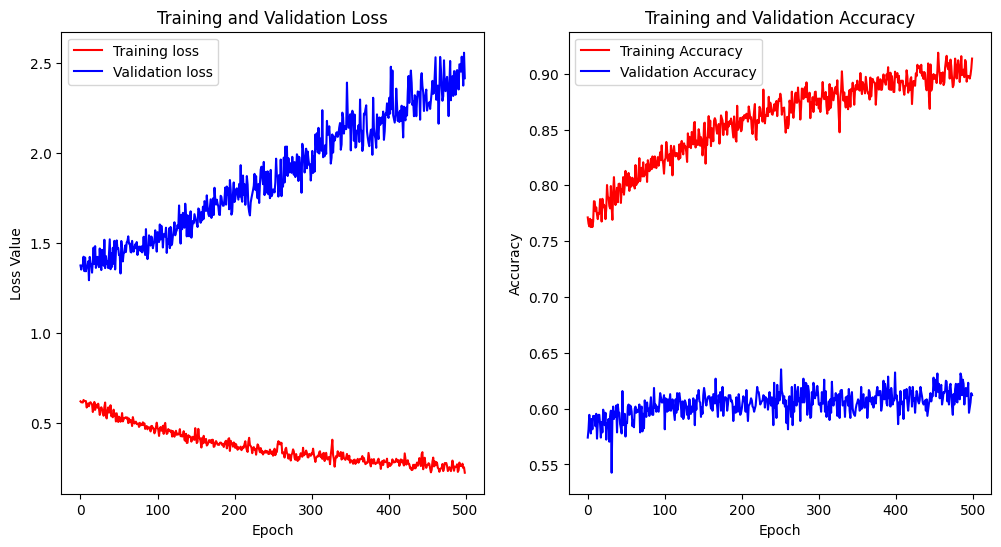

In [70]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**CLASSIFICATION REPORT**

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predicted_labels))
print('*'*50)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70        64
           1       0.60      0.70      0.65        74
           2       0.56      0.61      0.58        74
           3       0.74      0.55      0.63        77
           4       0.60      0.65      0.63        72
           5       0.56      0.42      0.48        36
           6       0.49      0.62      0.55        72
           7       0.70      0.52      0.60        75
           8       0.79      0.63      0.70        89
           9       0.80      0.67      0.73        66
          10       0.57      0.66      0.61        68
          11       0.62      0.56      0.59        73
          12       0.60      0.51      0.55        73
          13       0.50      0.54      0.52        35
          14       0.75      0.63      0.68        70
          15       0.56      0.63      0.59        62

   micro avg       0.63      0.61      0.62      1080
   macro avg       0.63   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
